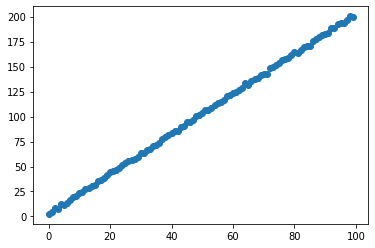

2.0459370744521914 0.044262268341917134
135.8646571973013


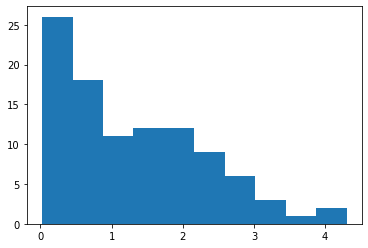

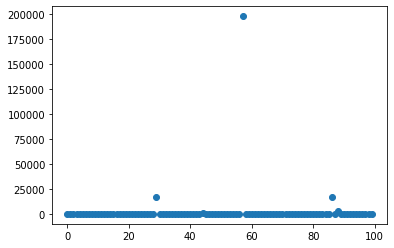

43.123893860556024 7.135306826241187
19600176863.579018


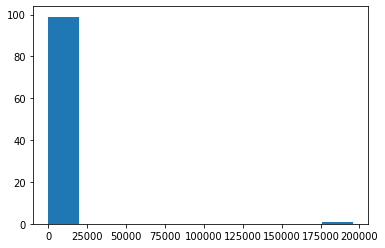

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
%matplotlib inline

# Fixing random state for reproducibility
np.random.seed(19680801)


def gd(actual_xs, actual_ys, initial_m, initial_c, learning_rate, number_of_iterations):
    m = initial_m
    c = initial_c

    def dydm(xs, ys, yhats):
        return -2 * np.sum(xs * (ys - yhats)) / len(xs)

    def dydc(ys, yhats):
        return -2 * np.sum(ys - yhats) / len(ys)

    while number_of_iterations > 0:
        yhats = m * actual_xs + c
        m -= dydm(actual_xs, actual_ys, yhats) * learning_rate
        c -= dydc(actual_ys, yhats) * learning_rate
        number_of_iterations -= 1

    return m, c


def calculate_SSE(actual_ys, actual_xs, m, c):
    return np.sum((actual_ys - (m * actual_xs + c)) ** 2) / 2
# there is another way to calculate the SSE. 
# try return np.sum((actual_ys - (m * actual_xs + c)) ** 2) / len(actual_xs)
# here I used the formula given in the slides.
    


def plot_residuals(actual_ys, predicted_ys):
    errors = np.abs(predicted_ys - actual_ys)
    plt.hist(errors, bins=10)
    plt.show()




if __name__ == '__main__':
    data = pd.read_csv("hw2_data1.csv", header=None)
    X = data.iloc[:, 0].to_numpy()
    Y = data.iloc[:, 1].to_numpy()
    plt.scatter(X, Y)
    plt.show()
    m, c = gd(X, Y, 0, 0, 0.0001, 100)
    print(m, c)
    print(calculate_SSE(Y, X, m, c))
    plot_residuals(Y, m * X + c)


    data = pd.read_csv("hw2_data2.csv", header=None)
    X = data.iloc[:, 0].to_numpy()
    Y = data.iloc[:, 1].to_numpy()
    plt.scatter(X, Y)
    plt.show()
    m, c = gd(X, Y, 0, 0, 0.0001, 100)
    print(m, c)
    print(calculate_SSE(Y, X, m, c))
    plot_residuals(Y, m * X + c)